In [2]:
import sys
import numpy as np
from pathlib import Path

sys.path.append("../")
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected = True)
pio.templates.default = "plotly_dark"

from pae.utils import load_json

In [14]:
from glob import glob
import pandas as pd

results_dir = Path("logs/20220301-144813") # 20220228-182256 20220301-122530 20220126-214227 20220301-144813
files = glob(str(results_dir) + "/js_pae_*.json")
jsdivs_pae = {f"{i:02d}":load_json(f) for i,f in enumerate(files) }

files2 = glob(str(results_dir) + "/js_pae2_*.json")
jsdivs_pae2 = {f"{i:02d}":load_json(f) for i,f in enumerate(files2) }

In [15]:
df0 = pd.DataFrame(jsdivs_pae)
m0 = df0.to_numpy()

x = np.arange(1,100)
y = np.mean(m0, axis=1)
y_upper = np.max(m0, axis=1)
y_lower = np.min(m0, axis=1)

df2 = pd.DataFrame(jsdivs_pae2)
m2 = df2.to_numpy()
y2 = np.mean(m2, axis=1)
y_upper2 = np.max(m2, axis=1)
y_lower2 = np.min(m2, axis=1)

In [16]:
roc = np.array([load_json(f)["auc"] for f in glob(str(results_dir) + "/roc_pae_*.json")])
roc2 = np.array([load_json(f)["auc"] for f in glob(str(results_dir) + "/roc_pae2_*.json")])

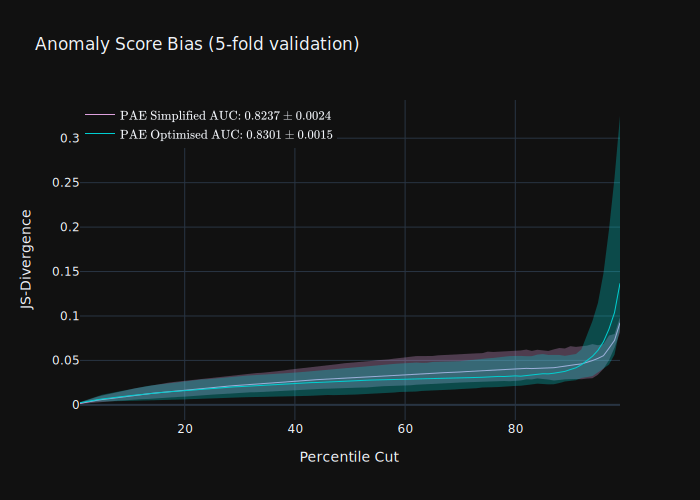

In [17]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(221,160,221)', width=1),
        mode='lines',
        name="$$\\text{PAE Simplified AUC:  }"+f"{roc.mean():.4f} \pm "+f"{roc.var():.4f}$$)"
    )
)
fig.add_trace(
    go.Scatter(
        x=np.concatenate([x, x[::-1]]), # x, then x reversed
        y=np.concatenate([y_upper,y_lower[::-1]]), # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(221,160,221,0.3)',
        line=dict(color='rgba(1,1,1,0)'),
        hoverinfo="skip",
        showlegend=False
    )
)
fig.add_trace(
    go.Scatter(
        x=x,
        y=y2,
        line=dict(color='rgb(0,206,209)', width=1),
        mode='lines',
        name="$$\\text{PAE Optimised AUC:  }"+f"{roc2.mean():.4f} \pm "+f"{roc2.var():.4f}$$)"
    )
)
fig.add_trace(
    go.Scatter(
        x=np.concatenate([x, x[::-1]]), # x, then x reversed
        y=np.concatenate([y_upper2,y_lower2[::-1]]), # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,206,209,0.3)',
        line=dict(color='rgba(1,1,1,0)'),
        hoverinfo="skip",
        showlegend=False
    )
)
fig.update_layout(
    title="Anomaly Score Bias (5-fold validation)",
    xaxis_title="Percentile Cut",
    yaxis_title="JS-Divergence",
    legend=dict(
        x=0,
        y=1)
)
fig.write_image("folds.pdf")
fig.show("svg")

In [7]:
print(roc.mean(), roc.var(), roc2.mean(), roc2.var())

0.8905469569569571 8.96937897601307e-05 0.8470463463463463 0.0015048574666077519


In [7]:
fig = go.Figure()
# fig.add_shape(
#     type='line', line=dict(dash='dash', color="tomato", width=1),
#     x0=90, x1=90, y0=0, y1=0.04, 
# )

fig.add_trace(
    go.Scatter(x=list(js_div_pae.keys()), y=list(js_div_nf.values()), mode='lines',
        name=r"$-\log p_x$", line=dict(color="rosybrown", width=3))
)
fig.add_trace(
    go.Scatter(x=list(js_div_pae.keys()), y=list(js_div_lpz.values()), mode='lines',
        name=r"$-\log p_z$", line=dict(color="chocolate", width=3))
)
fig.add_trace(
    go.Scatter(x=list(js_div_pae.keys()), y=list(js_div_mse.values()), mode='lines',
        name=r"$\text{MSE}$", line=dict(color="steelblue", width=3))
)
fig.add_trace(
    go.Scatter(x=list(js_div_pae.keys()), y=list(js_div_nmse.values()), mode='lines',
        name=r"$\text{MSE} \cdot \sigma^{\circ-2}$", line=dict(color="cornflowerblue", width=3))
)
fig.add_trace(
    go.Scatter(x=list(js_div_pae.keys()), y=list(js_div_pae.values()), mode='lines',
        name=r"$\text{PAE}$", line=dict(color="plum", width=3))
)



# fig.add_trace(go.Scatter(
#     x=[86],
#     y=[0.003],
#     mode="text",
#     text=["97th percentile"],
#     textposition="top center",
#     showlegend=False
# ))

fig.update_layout(
    title_text = "Mass sculpting",
    xaxis_title = "Percentile Cut",
    yaxis_title = "Jensen–Shannon",
    margin={'l': 80, 'b': 40, 't': 40, 'r': 0},
    width=600, height=500,
    paper_bgcolor='rgba(0,0,0,1)',
        legend = dict(x=0, y=1,
        traceorder='normal',
        font=dict(size=15))
)
fig.show('svg')
fig.write_image("JS-plot.pdf")

NameError: name 'js_div_pae' is not defined